Enter the number of variables: 2
Enter the number of constraints: 4
Enter the coefficients of the objective function:
80 120
Enter 'max' for maximization or 'min' for minimization: max
Enter the constraints in the format: coefficients followed by inequality sign (<=, >=, =) and RHS value:
1 1 <= 9
1 0 >= 2
0 1 >= 3
20 50 <= 360
Enter lower bound for x1: 0
Enter upper bound for x1: 20
Enter lower bound for x2: 0
Enter upper bound for x2: 20
Optimal solution found:
Bounding points of the feasible region:
(Exact boundary computation is non-trivial but can be inferred from constraints)
Variables:
x1 = 3.0
x2 = 6.0
Objective value = 960.0
The feasible region is bounded.


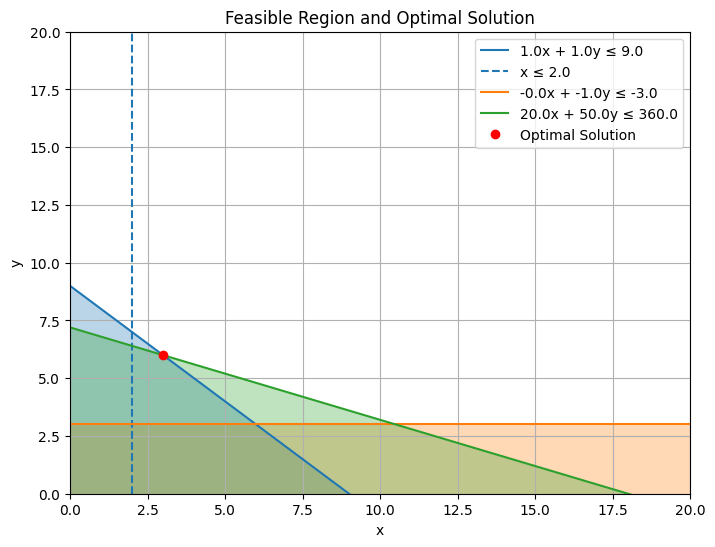

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

def solve_linear_program():
    # Take user input
    num_vars = int(input("Enter the number of variables: "))
    num_constraints = int(input("Enter the number of constraints: "))

    print("Enter the coefficients of the objective function:")
    c = list(map(float, input().split()))

    opt_type = input("Enter 'max' for maximization or 'min' for minimization: ").strip().lower()
    if opt_type == 'max':
        c = [-x for x in c]  # Convert maximization to minimization

    A_ub, b_ub, A_eq, b_eq = [], [], [], []
    print("Enter the constraints in the format: coefficients followed by inequality sign (<=, >=, =) and RHS value:")
    for _ in range(num_constraints):
        *coeffs, sign, rhs = input().split()
        coeffs = list(map(float, coeffs))
        rhs = float(rhs)
        if sign == '<=':
            A_ub.append(coeffs)
            b_ub.append(rhs)
        elif sign == '>=':
            A_ub.append([-x for x in coeffs])
            b_ub.append(-rhs)
        elif sign == '=':
            A_eq.append(coeffs)
            b_eq.append(rhs)

    x_bounds = [(float(input(f"Enter lower bound for x{i+1}: ")), float(input(f"Enter upper bound for x{i+1}: "))) for i in range(num_vars)]

    # Solve the linear programming problem
    res = linprog(c, A_ub=A_ub if A_ub else None, b_ub=b_ub if b_ub else None,
                  A_eq=A_eq if A_eq else None, b_eq=b_eq if b_eq else None, bounds=x_bounds, method='highs')

    if res.success:
        print("Optimal solution found:")
        print("Bounding points of the feasible region:")
        print("(Exact boundary computation is non-trivial but can be inferred from constraints)")
        print("Variables:")
        for i in range(num_vars):
            print(f"x{i+1} = {res.x[i]}")
        print(f"Objective value = {-res.fun if opt_type == 'max' else res.fun}")
        print("The feasible region is bounded.")
    else:
        print("No optimal solution found or the feasible region is unbounded.")

    # Plot the feasible region (for 2-variable problems only)
    if num_vars == 2:
        plot_feasible_region(A_ub, b_ub, A_eq, b_eq, x_bounds, res.x if res.success else None)

def plot_feasible_region(A_ub, b_ub, A_eq, b_eq, x_bounds, optimal_point=None):
    x = np.linspace(x_bounds[0][0], x_bounds[0][1], 400)

    plt.figure(figsize=(8, 6))

    for i in range(len(A_ub)):
        if A_ub[i][1] != 0:
            y = (b_ub[i] - A_ub[i][0] * x) / A_ub[i][1]
            plt.plot(x, y, label=f"{A_ub[i][0]}x + {A_ub[i][1]}y ≤ {b_ub[i]}")
            plt.fill_between(x, -1000, y, alpha=0.3)
        else:
            plt.axvline(x=b_ub[i] / A_ub[i][0], linestyle='--', label=f"x ≤ {b_ub[i] / A_ub[i][0]}")

    for i in range(len(A_eq)):
        if A_eq[i][1] != 0:
            y = (b_eq[i] - A_eq[i][0] * x) / A_eq[i][1]
            plt.plot(x, y, label=f"{A_eq[i][0]}x + {A_eq[i][1]}y = {b_eq[i]}", linestyle='dotted')
        else:
            plt.axvline(x=b_eq[i] / A_eq[i][0], linestyle='dotted', label=f"x = {b_eq[i] / A_eq[i][0]}")

    plt.xlim(x_bounds[0])
    plt.ylim(x_bounds[1])

    if optimal_point is not None:
        plt.plot(optimal_point[0], optimal_point[1], 'ro', label='Optimal Solution')

    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.title("Feasible Region and Optimal Solution")
    plt.grid()
    plt.show()

# Run the program
solve_linear_program()
